Saving EngGraph.csv to EngGraph.csv

Columns found in file:
['Word', 'Graphemes', 'Word Length', 'Number of Graphemes', 'Number of Vowels', 'Number of Consonants', 'Characters per Grapheme']
Derived columns added: label, score

Enter column name for Mean/Median calculation: Number of Graphemes
Enter column name for TRUE labels (0/1): label
Enter column name for predicted scores/probabilities: score

Mean of Number of Graphemes: 5.080282128409916
Median of Number of Graphemes: 5.0

AUC (Area Under ROC Curve): 1.0


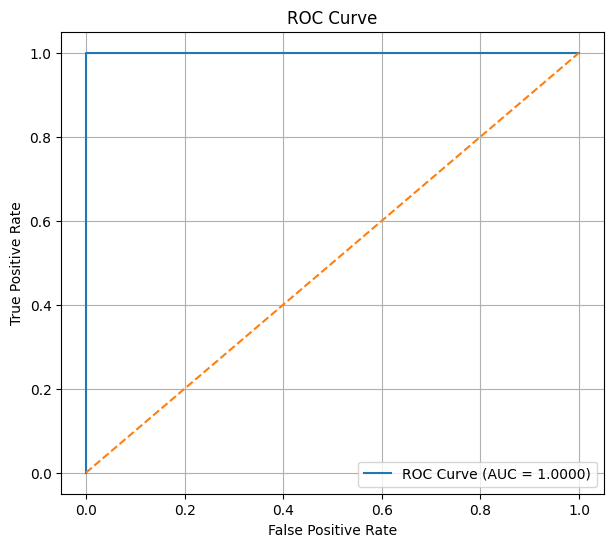


Choose graph type for value column:
1 - Bar Graph
2 - Histogram
3 - Line Graph

Enter choice (1/2/3): 2


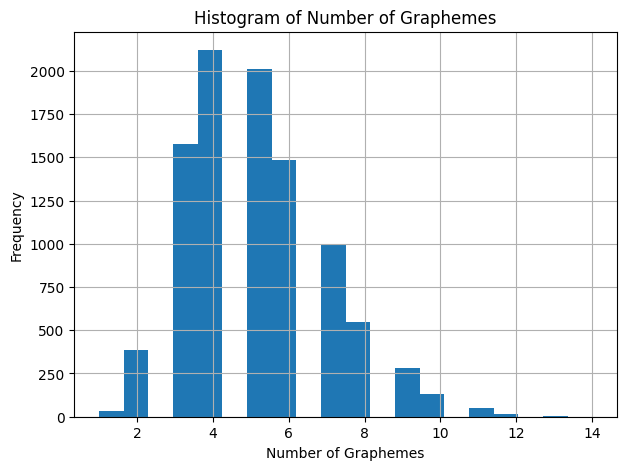

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from io import BytesIO
from google.colab import files


# Step 1: Upload File
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

# Load file
if file_name.endswith(".csv"):
    df = pd.read_csv(BytesIO(uploaded[file_name]))
elif file_name.endswith(".xls") or file_name.endswith(".xlsx"):
    df = pd.read_excel(BytesIO(uploaded[file_name]))
else:
    raise ValueError("Unsupported file format! Upload a CSV or Excel file.")

# Drop unwanted index column
if "Unnamed: 0" in df.columns:
    df = df.drop(columns=["Unnamed: 0"])

print("\nColumns found in file:")
print(df.columns.tolist())

if "Number of Graphemes" in df.columns and "label" not in df.columns:
    df["Number of Graphemes"] = pd.to_numeric(df["Number of Graphemes"], errors="coerce")
    df = df.dropna(subset=["Number of Graphemes"])

    threshold = df["Number of Graphemes"].median()
    df["label"] = (df["Number of Graphemes"] >= threshold).astype(int)
    df["score"] = df["Number of Graphemes"]

    print("Derived columns added: label, score")

# Step 2: Check for column names
value_column = input("\nEnter column name for Mean/Median calculation: ").strip()
true_col = input("Enter column name for TRUE labels (0/1): ").strip()
score_col = input("Enter column name for predicted scores/probabilities: ").strip()

# Force numeric conversion
df[value_column] = pd.to_numeric(df[value_column], errors="coerce")
df[true_col] = pd.to_numeric(df[true_col], errors="coerce")
df[score_col] = pd.to_numeric(df[score_col], errors="coerce")

df = df.dropna(subset=[value_column, true_col, score_col])


#  Mean & Median calculation
mean_val = df[value_column].mean()
median_val = df[value_column].median()

print(f"\nMean of {value_column}: {mean_val}")
print(f"Median of {value_column}: {median_val}")

#  ROC Curve
fpr, tpr, _ = roc_curve(df[true_col].astype(int), df[score_col])
roc_auc = auc(fpr, tpr)

print(f"\nAUC (Area Under ROC Curve): {roc_auc}")


# Plot ROC
plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

# Graph Type Selection
print("\nChoose graph type for value column:")
print("1 - Bar Graph")
print("2 - Histogram")
print("3 - Line Graph")

choice = input("\nEnter choice (1/2/3): ").strip()

plt.figure(figsize=(7, 5))

if choice == "1":
    df[value_column].value_counts().plot(kind="bar")
    plt.title(f"Bar Graph of {value_column}")
    plt.xlabel(value_column)
    plt.ylabel("Frequency")

elif choice == "2":
    plt.hist(df[value_column], bins=20)
    plt.title(f"Histogram of {value_column}")
    plt.xlabel(value_column)
    plt.ylabel("Frequency")

elif choice == "3":
    plt.plot(df[value_column])
    plt.title(f"Line Graph of {value_column}")
    plt.xlabel("Index")
    plt.ylabel(value_column)

else:
    print("Invalid choice! Showing histogram by default.")
    plt.hist(df[value_column], bins=20)
    plt.title(f"Histogram of {value_column}")

plt.grid(True)
plt.show()
